# DEVELOPMENT C3 WEEK 1

Explanataion of the task...

This task has many ways to solve it. First, we have to decide which local descriptor we are will use: SIFT, Dense SIFT, ORB or AKAZE. Each one will be tested first with a standard configuration and see which are the results.

In [2]:
import os
import json
import time
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import run_experiment

os.makedirs("results", exist_ok=True)

In [3]:
def load_json(config_path):
    """
    Loads the experiments list from a json file
    """
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"Please create the file {config_path} first!")

    with open(config_path, "r") as f:
        experiments_list = json.load(f)

    return experiments_list

def load_existing_results(csv_path):
    """
    Checks if a results CSV exists. If so, loads it as a list of dictionaries.
    If not, returns an empty list.
    """
    if os.path.exists(csv_path):
        print(f"Resuming from existing file: {csv_path}")
        df = pd.read_csv(csv_path)
        return df.to_dict("records")
    return []

def is_experiment_completed(run_name, results_list, key="Descriptor"):
    """
    Checks if a specific run_name already exists in the results list.
    """
    return any(d[key] == run_name for d in results_list)

In [9]:
# Configuration
config_path = "configs/local_descriptors.json"
results_path = "results/local_descriptors.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 3 experiments from configs/local_descriptors.json
3 experiments to run after filtering completed ones.

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N500\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:39<00:00, 87.00it/s] 


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:51<00:00, 170.56it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 2083.49it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N500\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:25<00:00, 85.96it/s] 


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:15<00:00, 139.70it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: ORB (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\ORB_keypoints_N500\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [00:42<00:00, 203.24it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:51<00:00, 170.25it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1967.08it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1657 (+/- 0.0078)
Accuracy on Phase [Train]: 0.2043
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\ORB_keypoints_N500\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:10<00:00, 213.70it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:14<00:00, 151.88it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1645

Running: AKAZE (Default)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\AKAZE_keypoints\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:00<00:00, 143.83it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:47<00:00, 181.55it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 2078.14it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1726 (+/- 0.0066)
Accuracy on Phase [Train]: 0.2097
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\AKAZE_keypoints\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:15<00:00, 140.42it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:12<00:00, 177.79it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1791
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,SIFT (N=500),0.302529,0.279545,"[0.25632183908045975, 0.27298850574712646, 0.2...",255.485340
1,ORB (N=500),0.204253,0.164545,"[0.17126436781609194, 0.167816091954023, 0.174...",133.185345
2,AKAZE (Default),0.209655,0.179091,"[0.17586206896551723, 0.17701149425287357, 0.1...",150.267757



All experiments finished.


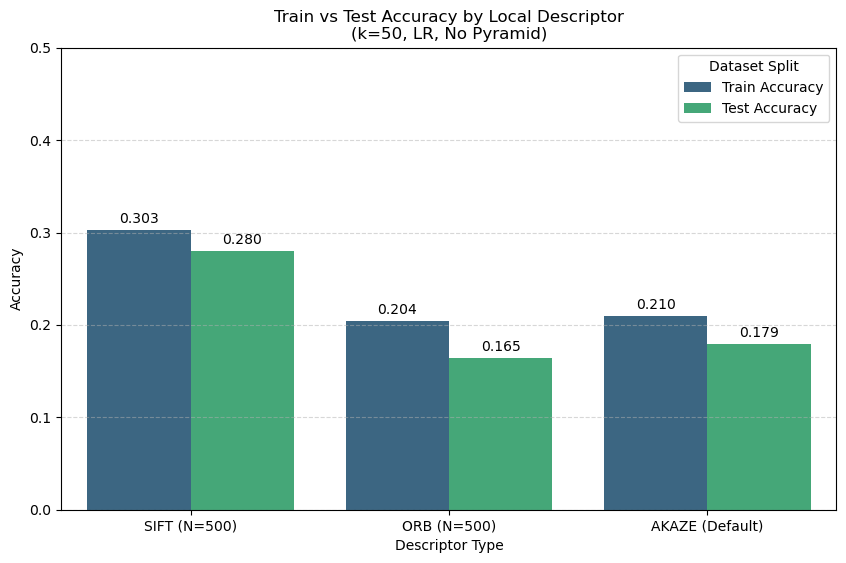

In [10]:
#load data
df = pd.read_csv("results/local_descriptors.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Grouped Bar Plot
ax = sns.barplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis"
)

# Add numeric labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title("Train vs Test Accuracy by Local Descriptor\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Adjusted limit since values are around 0.2 - 0.3
plt.ylabel("Accuracy")
plt.xlabel("Descriptor Type")
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Nfeatures of sift

In [11]:
# Load experiments from JSON
config_path = "configs/sift_nfeatures.json"
results_path = "results/sift_nfeatures.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })
    
# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 8 experiments from configs/sift_nfeatures.json
8 experiments to run after filtering completed ones.

Running: SIFT (N=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:31<00:00, 95.04it/s] 


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:41<00:00, 210.10it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:02<00:00, 3501.97it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1890 (+/- 0.0183)
Accuracy on Phase [Train]: 0.2325
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:22<00:00, 95.93it/s] 


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:11<00:00, 188.10it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2041

Running: SIFT (N=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N100\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:39<00:00, 87.19it/s] 


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:46<00:00, 185.34it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:02<00:00, 3193.70it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2084 (+/- 0.0203)
Accuracy on Phase [Train]: 0.2533
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N100\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:23<00:00, 92.21it/s] 


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:11<00:00, 197.13it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2305

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:04<00:00, 2122.78it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1992.30it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1863.68it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: SIFT (N=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1000\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:11<00:00, 65.95it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:51<00:00, 167.42it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:06<00:00, 1355.55it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2666 (+/- 0.0197)
Accuracy on Phase [Train]: 0.3128
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1000\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:26<00:00, 82.76it/s] 


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:14<00:00, 149.39it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2968

Running: SIFT (N=1500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1500\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:18<00:00, 62.88it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:51<00:00, 168.30it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:06<00:00, 1391.32it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0131)
Accuracy on Phase [Train]: 0.3190
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N1500\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:26<00:00, 82.54it/s] 


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:15<00:00, 142.58it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2882

Running: SIFT (N=3000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N3000\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:24<00:00, 60.39it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:57<00:00, 150.67it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:08<00:00, 1068.72it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N3000\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:31<00:00, 70.80it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 135.67it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=5000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N5000\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:38<00:00, 54.73it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:54<00:00, 160.60it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:06<00:00, 1292.93it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N5000\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:30<00:00, 71.11it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 133.74it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=10000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N10000\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [02:45<00:00, 52.43it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:56<00:00, 153.81it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:07<00:00, 1119.93it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N10000\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:31<00:00, 69.38it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:14<00:00, 155.24it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2909
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,SIFT (N=50),0.232529,0.204091,"[0.2074712643678161, 0.20977011494252873, 0.18...",179.703144
1,SIFT (N=100),0.253333,0.230455,"[0.2206896551724138, 0.24080459770114943, 0.20...",194.209655
2,SIFT (N=500),0.302529,0.279545,"[0.25632183908045975, 0.27298850574712646, 0.2...",19.692358
3,SIFT (N=1000),0.312759,0.296818,"[0.2649425287356322, 0.3045977011494253, 0.258...",241.630604
4,SIFT (N=1500),0.318966,0.288182,"[0.2718390804597701, 0.2925287356321839, 0.271...",248.572399
5,SIFT (N=3000),0.310920,0.290909,"[0.2752873563218391, 0.3005747126436782, 0.262...",267.949265
6,SIFT (N=5000),0.310920,0.290909,"[0.2752873563218391, 0.3005747126436782, 0.262...",277.374228
7,SIFT (N=10000),0.310920,0.290909,"[0.2752873563218391, 0.3005747126436782, 0.262...",286.475468



All experiments finished.


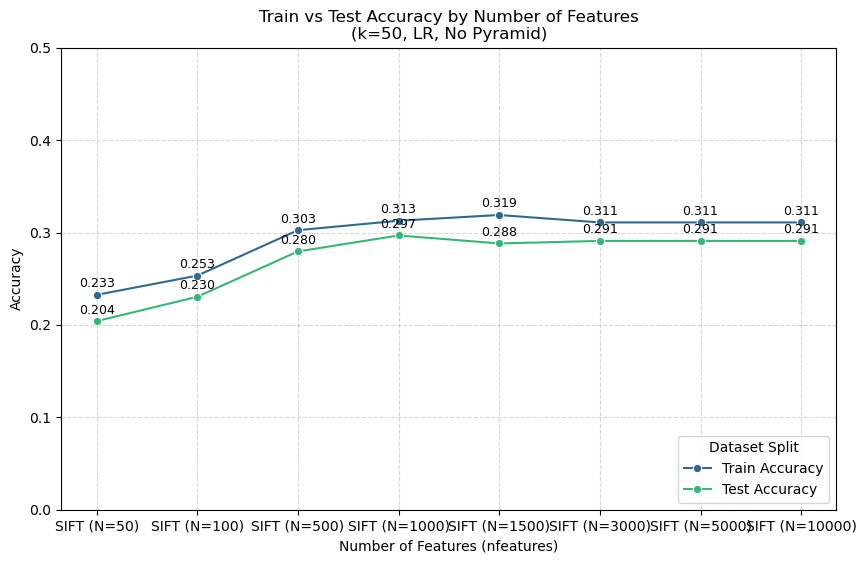

In [12]:
# load data
df = pd.read_csv("results/sift_nfeatures.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

plt.figure(figsize=(10, 6))

# Line Plot
ax = sns.lineplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis",
    marker="o" 
)

# Labeling values on a line chart (Optional)
# This loop adds the text label next to each point
for x, y, val in zip(df_melted["Descriptor"], df_melted["Accuracy"], df_melted["Accuracy"]):
    plt.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.title("Train vs Test Accuracy by Number of Features\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Keep your limits or adjust as needed
plt.ylabel("Accuracy")
plt.xlabel("Number of Features (nfeatures)")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Dense SIFT

In [14]:
# Configuration
config_path = "configs/dense_sift.json"

# --- GRID SEARCH PARAMETERS ---
step_sizes = [4, 8, 16, 32]   # X-axis: Density (smaller = denser)
scale_factors = [1, 2, 4]     # Y-axis: Relative Size (Scale = Step / Factor)

# Common base configuration
BASE_CONFIG = {
    "data_path": "../data/MIT_split/",
    "seed": 42,
    
    "detector": "SIFT",
    "dense": True,
    "detector_kwargs": {},
    
    "codebook_size": 50,
    "spatial_pyramid": False,
    "levels": [1],
    
    "classifier": "LogisticRegression",
    "C": 1.0,
    "gamma": "scale",

    "codebook_batch_size": 1000,

    "max_samples_train": None,
    "max_samples_test": None
}

# --- EXPERIMENT GENERATOR ---
experiments_list = []

for step in step_sizes:
    for factor in scale_factors:
        # Calculate actual scale in pixels
        scale_pixels = int(step / factor)
        
        # Copy base config
        cfg = BASE_CONFIG.copy()
        
        # Inject variable parameters
        cfg["step_size"] = step
        cfg["scale"] = scale_pixels
        
        # Save metadata for plotting later
        exp_name = f"Dense (Step={step}, Scale={scale_pixels})"
        
        experiments_list.append({
            "name": exp_name,
            "config": cfg,
            "meta_step": step,
            "meta_factor": factor,
            "meta_scale": scale_pixels,
        })

with open(config_path, "w") as final:
    json.dump(experiments_list, final, indent=4)

print(f"Generated {len(experiments_list)} and save in {config_path}.")

Generated 12 and save in configs/dense_sift.json.


In [28]:
config_path = "configs/dense_sift.json"
results_path = "results/dense_sift.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for i, exp in enumerate(experiments_list):
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")

    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    # Store results + metadata for plotting
    results_data.append({
        "Descriptor": run_name,
        "Step Size": exp["meta_step"],
        "Scale Factor": exp["meta_factor"],
        "Scale": exp["meta_scale"],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

print("\nGrid Search completed!") 

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 12 experiments from configs/dense_sift.json
12 experiments to run after filtering completed ones.

Running: Dense (Step=4, Scale=4)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:22<00:00, 106.03it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:40<00:00, 214.26it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2903 (+/- 0.0166)
Accuracy on Phase [Train]: 0.3401
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:22<00:00, 97.72it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.3186

Running: Dense (Step=4, Scale=2)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:19<00:00, 109.81it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:45<00:00, 193.29it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2884 (+/- 0.0066)
Accuracy on Phase [Train]: 0.3329
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:25<00:00, 85.85it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3205

Running: Dense (Step=4, Scale=1)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:25<00:00, 101.32it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:49<00:00, 175.04it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2874 (+/- 0.0134)
Accuracy on Phase [Train]: 0.3339
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:25<00:00, 86.22it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3036

Running: Dense (Step=8, Scale=8)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:08<00:00, 126.76it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:18<00:00, 477.69it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2884 (+/- 0.0139)
Accuracy on Phase [Train]: 0.3356
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:18<00:00, 120.67it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3173

Running: Dense (Step=8, Scale=4)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:16<00:00, 113.42it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:20<00:00, 421.99it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2816 (+/- 0.0088)
Accuracy on Phase [Train]: 0.3307
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:27<00:00, 79.69it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3145

Running: Dense (Step=8, Scale=2)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:37<00:00, 89.32it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:20<00:00, 418.68it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2808 (+/- 0.0070)
Accuracy on Phase [Train]: 0.3307
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:27<00:00, 79.99it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.3059

Running: Dense (Step=16, Scale=16)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:34<00:00, 92.55it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:09<00:00, 948.27it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2616 (+/- 0.0092)
Accuracy on Phase [Train]: 0.3099
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:23<00:00, 92.64it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2864

Running: Dense (Step=16, Scale=8)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:33<00:00, 93.25it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:08<00:00, 977.00it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2889 (+/- 0.0129)
Accuracy on Phase [Train]: 0.3416
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:20<00:00, 107.04it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3264

Running: Dense (Step=16, Scale=4)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:36<00:00, 90.60it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:09<00:00, 927.70it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2711 (+/- 0.0128)
Accuracy on Phase [Train]: 0.3222
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:24<00:00, 90.09it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3077

Running: Dense (Step=32, Scale=32)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:09<00:00, 124.77it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1646.03it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2167 (+/- 0.0106)
Accuracy on Phase [Train]: 0.2694
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:14<00:00, 156.27it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2495

Running: Dense (Step=32, Scale=16)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:56<00:00, 153.84it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1593.19it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2661 (+/- 0.0064)
Accuracy on Phase [Train]: 0.3133
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:21<00:00, 103.58it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2868

Running: Dense (Step=32, Scale=8)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:00<00:00, 142.63it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1653.17it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2600 (+/- 0.0139)
Accuracy on Phase [Train]: 0.3099
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 133.23it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2941

Grid Search completed!
Processed Results:


,Descriptor,Step Size,Scale Factor,Scale,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,"Dense (Step=4, Scale=4)",4,1,4,0.340115,0.318636,"[0.2988505747126437, 0.3120689655172414, 0.296...",159.311387
1,"Dense (Step=4, Scale=2)",4,2,2,0.332874,0.320455,"[0.28620689655172415, 0.296551724137931, 0.295...",178.203363
2,"Dense (Step=4, Scale=1)",4,4,1,0.333908,0.303636,"[0.2827586206896552, 0.3040229885057471, 0.302...",190.247833
3,"Dense (Step=8, Scale=8)",8,1,8,0.335632,0.317273,"[0.30114942528735633, 0.3086206896551724, 0.27...",164.183686
4,"Dense (Step=8, Scale=4)",8,2,4,0.330690,0.314545,"[0.28563218390804596, 0.29540229885057473, 0.2...",140.163619
5,"Dense (Step=8, Scale=2)",8,4,2,0.330690,0.305909,"[0.28735632183908044, 0.2908045977011494, 0.27...",161.616699
6,"Dense (Step=16, Scale=16)",16,1,16,0.309885,0.286364,"[0.2517241379310345, 0.2747126436781609, 0.258...",142.903489
7,"Dense (Step=16, Scale=8)",16,2,8,0.341609,0.326364,"[0.30344827586206896, 0.3057471264367816, 0.27...",138.050523
8,"Dense (Step=16, Scale=4)",16,4,4,0.322184,0.307727,"[0.27988505747126435, 0.2913793103448276, 0.26...",145.223500
9,"Dense (Step=32, Scale=32)",32,1,32,0.269425,0.249545,"[0.2074712643678161, 0.22758620689655173, 0.20...",104.779328



All experiments finished.


Numerical Results:


Scale Factor,1,2,4
Step Size,,,
4,0.318636,0.320455,0.303636
8,0.317273,0.314545,0.305909
16,0.286364,0.326364,0.307727
32,0.249545,0.286818,0.294091


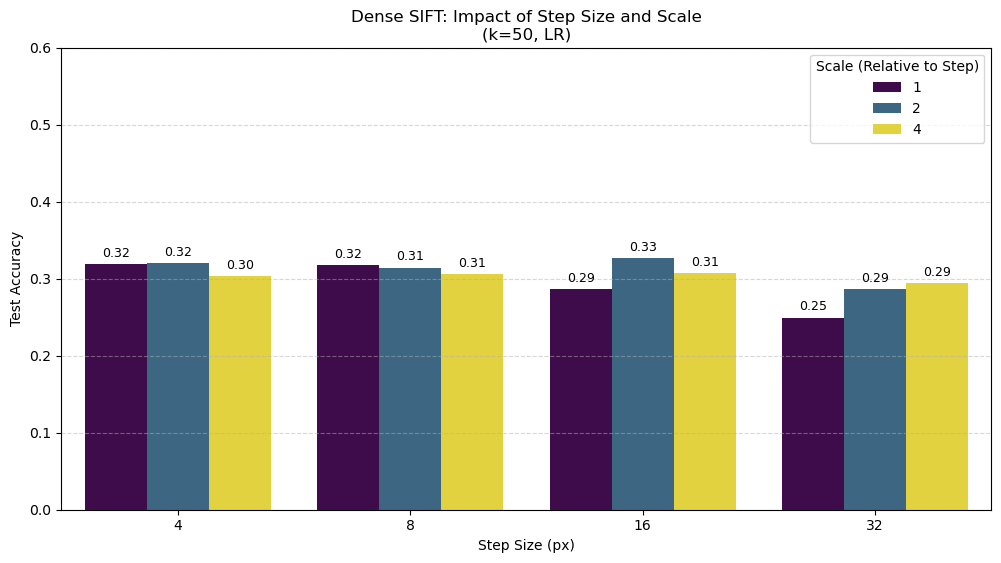

In [ ]:
# Create DataFrame
df = pd.DataFrame(results_data)

# Show numerical table
print("Numerical Results:")
display(df.pivot(index="Step Size", columns="Scale Factor", values="Test Accuracy"))

# --- PLOT ---
plt.figure(figsize=(12, 6))

# Ensure X-axis is treated as categorical (strings) to avoid uneven spacing
df["Step Size"] = df["Step Size"].astype(str)

# Grouped Bar Plot by Scale Factor
ax = sns.barplot(
    data=df,
    x="Step Size",
    y="Test Accuracy",
    hue="Scale Factor",
    palette="viridis"
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.title("Dense SIFT: Impact of Step Size and Scale\n(k=50, LR)")
plt.ylim(0, 0.6) # Adjust this limit based on your max results
plt.ylabel("Test Accuracy")
plt.xlabel("Step Size (px)")
plt.legend(title="Scale Factor", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Codebook size k

## STEP SIZE 16 SCALE 8

In [17]:
# Configuration
config_path = "configs/codebook_size.json"
results_path = "results/codebook_size.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 14 experiments from configs/codebook_size.json
14 experiments to run after filtering completed ones.

Running: SIFT (k=10)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:55<00:00, 156.90it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:08<00:00, 1056.65it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1926 (+/- 0.0125)
Accuracy on Phase [Train]: 0.2194
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 134.48it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2164

Running: SIFT (k=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 762.47it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:09<00:00, 893.20it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2641 (+/- 0.0193)
Accuracy on Phase [Train]: 0.3156
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 903.56it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2986

Running: SIFT (k=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 749.92it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:10<00:00, 812.25it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2784 (+/- 0.0127)
Accuracy on Phase [Train]: 0.3484
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 896.49it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3141

Running: SIFT (k=200)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 778.78it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:10<00:00, 838.60it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2854 (+/- 0.0220)
Accuracy on Phase [Train]: 0.3808
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 843.36it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3327

Running: SIFT (k=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:13<00:00, 644.39it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 628.84it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3037 (+/- 0.0166)
Accuracy on Phase [Train]: 0.4466
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 645.46it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3282

Running: SIFT (k=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:17<00:00, 497.73it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:17<00:00, 487.71it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3034 (+/- 0.0239)
Accuracy on Phase [Train]: 0.5051
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 491.33it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3364

Running: SIFT (k=2000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:25<00:00, 346.84it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:24<00:00, 348.55it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3040 (+/- 0.0175)
Accuracy on Phase [Train]: 0.5815
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 347.97it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3305

Running: Dense SIFT (k=10)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:08<00:00, 974.97it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1824.53it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2284 (+/- 0.0116)
Accuracy on Phase [Train]: 0.2530
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1728.10it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2436

Running: Dense SIFT (k=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 956.57it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1664.24it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2837 (+/- 0.0122)
Accuracy on Phase [Train]: 0.3320
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1632.96it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3050

Running: Dense SIFT (k=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 938.31it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:05<00:00, 1470.21it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2901 (+/- 0.0093)
Accuracy on Phase [Train]: 0.3625
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1450.66it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3355

Running: Dense SIFT (k=200)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 869.02it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:06<00:00, 1255.03it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3082 (+/- 0.0115)
Accuracy on Phase [Train]: 0.4045
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1252.60it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3573

Running: Dense SIFT (k=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 745.72it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:08<00:00, 969.79it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3160 (+/- 0.0152)
Accuracy on Phase [Train]: 0.4721
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 940.04it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3541

Running: Dense SIFT (k=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:13<00:00, 623.00it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 712.42it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3137 (+/- 0.0117)
Accuracy on Phase [Train]: 0.5239
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 667.48it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3705

Running: Dense SIFT (k=2000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:18<00:00, 458.11it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:20<00:00, 420.09it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3185 (+/- 0.0175)
Accuracy on Phase [Train]: 0.5861
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 417.84it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3682
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,SIFT (k=10),0.219425,0.216364,"[0.1793103448275862, 0.20517241379310344, 0.20...",92.636992
1,SIFT (k=50),0.315632,0.298636,"[0.25057471264367814, 0.30114942528735633, 0.2...",34.986966
2,SIFT (k=100),0.348391,0.314091,"[0.27413793103448275, 0.3028735632183908, 0.27...",36.221768
3,SIFT (k=200),0.380805,0.332727,"[0.2942528735632184, 0.31724137931034485, 0.29...",35.327341
4,SIFT (k=500),0.446552,0.328182,"[0.30114942528735633, 0.332183908045977, 0.306...",43.525740
5,SIFT (k=1000),0.505057,0.336364,"[0.3005747126436782, 0.34195402298850575, 0.31...",55.988386
6,SIFT (k=2000),0.581494,0.330455,"[0.3074712643678161, 0.3310344827586207, 0.310...",77.770330
7,Dense SIFT (k=10),0.252989,0.243636,"[0.22126436781609196, 0.2471264367816092, 0.22...",24.265968
8,Dense SIFT (k=50),0.331954,0.305000,"[0.2908045977011494, 0.30344827586206896, 0.27...",26.041830
9,Dense SIFT (k=100),0.362529,0.335455,"[0.29022988505747127, 0.3063218390804598, 0.27...",27.239259



All experiments finished.


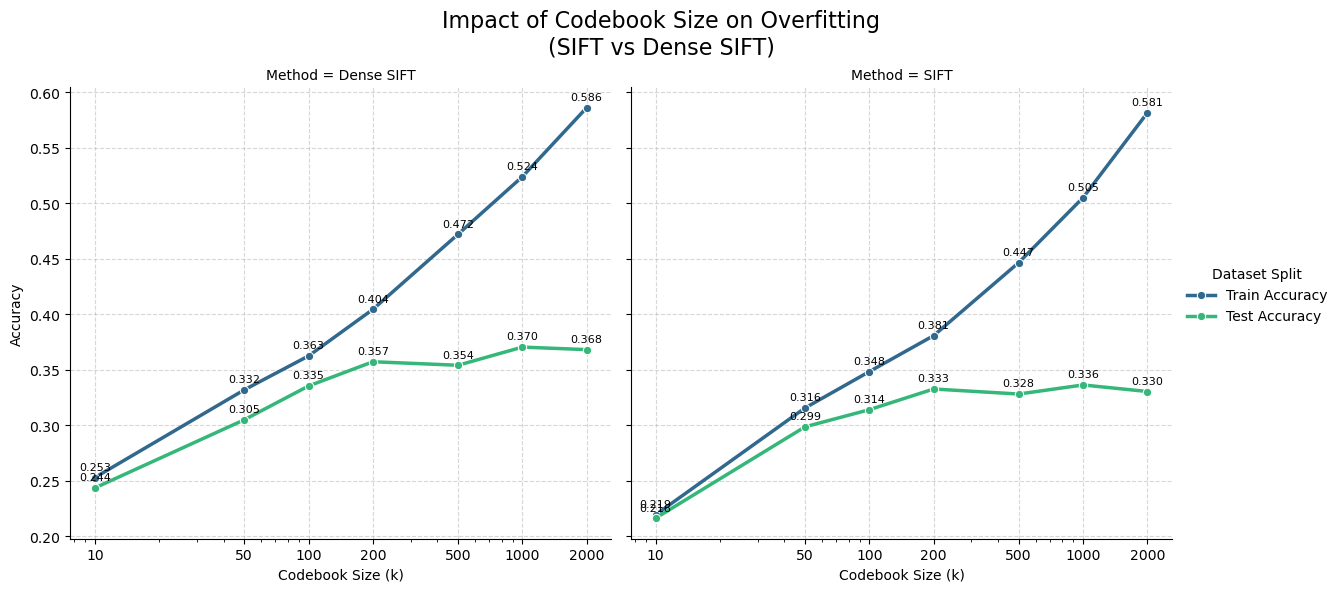

In [ ]:
from matplotlib.ticker import ScalarFormatter

# 1. Load data
results_path = "results/codebook_size.csv"

if not os.path.exists(results_path):
    print("Results file not found.")
else:
    df = pd.read_csv(results_path)

    # 2. Parsing: Separate "Method" from "Codebook_Size"
    # We turn "Dense SIFT (k=10)" -> Method="Dense SIFT", k=10
    def parse_row(row):
        # Extract number
        k = int(re.search(r'k=(\d+)', row).group(1))
        # Extract name (everything before parenthesis)
        name = row.split('(')[0].strip()
        return pd.Series([name, k])

    df[['Method', 'Codebook_Size']] = df['Descriptor'].apply(parse_row)

    # 3. Melt (Train vs Test)
    df_melted = df.melt(
        id_vars=["Method", "Codebook_Size"], 
        value_vars=["Train Accuracy", "Test Accuracy"], 
        var_name="Split", 
        value_name="Accuracy"
    )

    # Sort for clean plotting
    df_melted = df_melted.sort_values(by=["Method", "Codebook_Size"])

    # 4. PLOTTING with FacetGrid (Side-by-Side)
    # This creates one subplot per Method
    g = sns.FacetGrid(df_melted, col="Method", height=6, aspect=1, sharey=True)
    
    # Map the lineplot to each subplot
    g.map_dataframe(
        sns.lineplot, 
        x="Codebook_Size", 
        y="Accuracy", 
        hue="Split", 
        palette="viridis", 
        marker="o",
        linewidth=2.5
    )

    # 5. Apply your Custom Styling to EACH subplot
    unique_k = sorted(df['Codebook_Size'].unique())

    for ax in g.axes.flat:
        # --- KEY CHANGE: LOG SCALE ---
        ax.set_xscale('log')
        
        # --- KEY CHANGE: FIX TICKS ---
        ax.set_xticks(unique_k)
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_ylabel("Accuracy")
        ax.set_xlabel("Codebook Size (k)")

    # 6. Add Text Labels (A bit trickier with FacetGrid, but possible)
    # We iterate through the data to place text on the correct axes
    methods = df_melted['Method'].unique()
    for i, method in enumerate(methods):
        ax = g.axes.flat[i]
        subset = df_melted[df_melted['Method'] == method]
        
        for _, row in subset.iterrows():
            ax.text(
                row['Codebook_Size'], 
                row['Accuracy'] + 0.005, 
                f"{row['Accuracy']:.3f}", 
                ha='center', va='bottom', fontsize=8, color='black'
            )

    # Add Legend and Title
    g.add_legend(title="Dataset Split")
    plt.subplots_adjust(top=0.85) # Make room for title
    g.fig.suptitle("Impact of Codebook Size on Overfitting\n(SIFT vs Dense SIFT)", fontsize=16)

    plt.show()

## STEP SIZE 8 SCALE 8

In [ ]:
# Configuration
config_path = "configs/codebook_size_8x8.json"
results_path = "results/codebook_size_8x8.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 7 experiments from configs/codebook_size_2.json
7 experiments to run after filtering completed ones.

Running: Dense SIFT (k=10)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:15<00:00, 547.97it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:10<00:00, 834.76it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2371 (+/- 0.0143)
Accuracy on Phase [Train]: 0.2592
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 878.02it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2464

Running: Dense SIFT (k=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:18<00:00, 479.28it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:16<00:00, 534.35it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2924 (+/- 0.0128)
Accuracy on Phase [Train]: 0.3453
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 514.34it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3268

Running: Dense SIFT (k=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:19<00:00, 450.49it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:19<00:00, 452.49it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3094 (+/- 0.0158)
Accuracy on Phase [Train]: 0.3734
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 464.66it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3500

Running: Dense SIFT (k=200)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:20<00:00, 434.83it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:21<00:00, 398.50it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3198 (+/- 0.0113)
Accuracy on Phase [Train]: 0.4144
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 393.60it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3677

Running: Dense SIFT (k=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:25<00:00, 341.63it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:26<00:00, 332.22it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3259 (+/- 0.0100)
Accuracy on Phase [Train]: 0.4648
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 351.66it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3964

Running: Dense SIFT (k=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:33<00:00, 259.61it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:31<00:00, 274.86it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3297 (+/- 0.0180)
Accuracy on Phase [Train]: 0.5164
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:07<00:00, 286.41it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3923

Running: Dense SIFT (k=2000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:50<00:00, 173.49it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:51<00:00, 168.00it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3357 (+/- 0.0177)
Accuracy on Phase [Train]: 0.5748
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:13<00:00, 162.61it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3950
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,Dense SIFT (k=10),0.259195,0.246364,"[0.2218390804597701, 0.2632183908045977, 0.232...",45.169032
1,Dense SIFT (k=50),0.345287,0.326818,"[0.30517241379310345, 0.30977011494252876, 0.2...",52.400569
2,Dense SIFT (k=100),0.373448,0.350000,"[0.32241379310344825, 0.332183908045977, 0.295...",57.796695
3,Dense SIFT (k=200),0.414368,0.367727,"[0.3275862068965517, 0.3373563218390805, 0.316...",61.773374
4,Dense SIFT (k=500),0.464828,0.396364,"[0.3252873563218391, 0.34195402298850575, 0.33...",74.337271
5,Dense SIFT (k=1000),0.516437,0.392273,"[0.3264367816091954, 0.36149425287356324, 0.33...",92.220221
6,Dense SIFT (k=2000),0.574828,0.395000,"[0.3471264367816092, 0.36149425287356324, 0.33...",142.055849



All experiments finished.


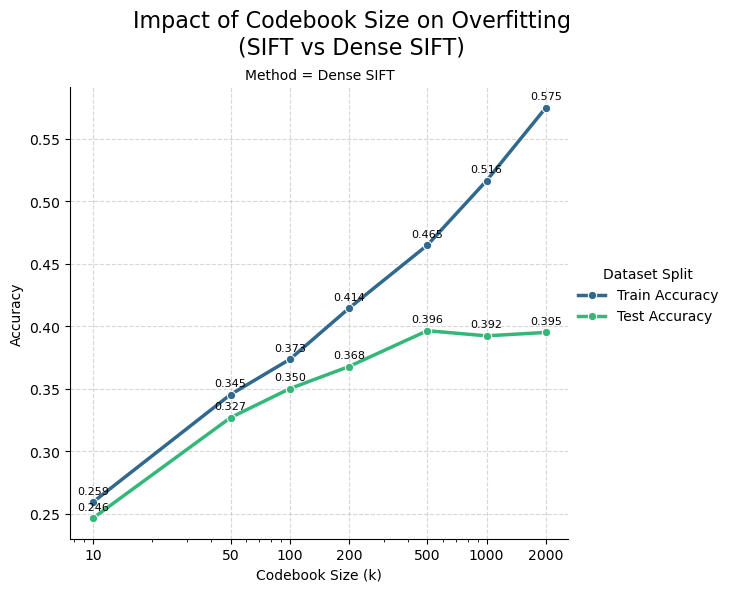

In [36]:
from matplotlib.ticker import ScalarFormatter

# 1. Load data
results_path = "results/codebook_size_2.csv"

if not os.path.exists(results_path):
    print("Results file not found.")
else:
    df = pd.read_csv(results_path)

    # 2. Parsing: Separate "Method" from "Codebook_Size"
    # We turn "Dense SIFT (k=10)" -> Method="Dense SIFT", k=10
    def parse_row(row):
        # Extract number
        k = int(re.search(r'k=(\d+)', row).group(1))
        # Extract name (everything before parenthesis)
        name = row.split('(')[0].strip()
        return pd.Series([name, k])

    df[['Method', 'Codebook_Size']] = df['Descriptor'].apply(parse_row)

    # 3. Melt (Train vs Test)
    df_melted = df.melt(
        id_vars=["Method", "Codebook_Size"], 
        value_vars=["Train Accuracy", "Test Accuracy"], 
        var_name="Split", 
        value_name="Accuracy"
    )

    # Sort for clean plotting
    df_melted = df_melted.sort_values(by=["Method", "Codebook_Size"])

    # 4. PLOTTING with FacetGrid (Side-by-Side)
    # This creates one subplot per Method
    g = sns.FacetGrid(df_melted, col="Method", height=6, aspect=1, sharey=True)
    
    # Map the lineplot to each subplot
    g.map_dataframe(
        sns.lineplot, 
        x="Codebook_Size", 
        y="Accuracy", 
        hue="Split", 
        palette="viridis", 
        marker="o",
        linewidth=2.5
    )

    # 5. Apply your Custom Styling to EACH subplot
    unique_k = sorted(df['Codebook_Size'].unique())

    for ax in g.axes.flat:
        # --- KEY CHANGE: LOG SCALE ---
        ax.set_xscale('log')
        
        # --- KEY CHANGE: FIX TICKS ---
        ax.set_xticks(unique_k)
        ax.get_xaxis().set_major_formatter(ScalarFormatter())
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_ylabel("Accuracy")
        ax.set_xlabel("Codebook Size (k)")

    # 6. Add Text Labels (A bit trickier with FacetGrid, but possible)
    # We iterate through the data to place text on the correct axes
    methods = df_melted['Method'].unique()
    for i, method in enumerate(methods):
        ax = g.axes.flat[i]
        subset = df_melted[df_melted['Method'] == method]
        
        for _, row in subset.iterrows():
            ax.text(
                row['Codebook_Size'], 
                row['Accuracy'] + 0.005, 
                f"{row['Accuracy']:.3f}", 
                ha='center', va='bottom', fontsize=8, color='black'
            )

    # Add Legend and Title
    g.add_legend(title="Dataset Split")
    plt.subplots_adjust(top=0.85) # Make room for title
    g.fig.suptitle("Impact of Codebook Size on Overfitting\n(SIFT vs Dense SIFT)", fontsize=16)

    plt.show()

# FROM HERE DENSE SIFT IS STEP SIZE 8 SCLAE 8

# Dimensionality Reduction

In [4]:
# Configuration
config_path = "configs/dim_reduction_8x8.json"
results_path = "results/dim_reduction_8x8.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Loaded 16 experiments from configs/dim_reduction_8x8.json
16 experiments to run after filtering completed ones.

Running: SIFT (pca_components=1)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [01:20<00:00, 107.98it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:08<00:00, 975.03it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:07<00:00, 1197.15it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1800 (+/- 0.0116)
Accuracy on Phase [Train]: 0.2603
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:18<00:00, 118.70it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1850

Running: SIFT (pca_components=2)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:28<00:00, 309.66it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 855.78it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:10<00:00, 868.92it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2122 (+/- 0.0150)
Accuracy on Phase [Train]: 0.2978
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 852.09it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2250

Running: SIFT (pca_components=4)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:27<00:00, 312.05it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 837.53it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:10<00:00, 852.78it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2495 (+/- 0.0158)
Accuracy on Phase [Train]: 0.3441
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 825.68it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2841

Running: SIFT (pca_components=8)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:26<00:00, 331.07it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 840.48it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:09<00:00, 881.92it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2764 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3656
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 877.75it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3200

Running: SIFT (pca_components=16)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:25<00:00, 335.04it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:11<00:00, 785.14it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:09<00:00, 899.90it/s] 


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2833 (+/- 0.0101)
Accuracy on Phase [Train]: 0.3769
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 872.40it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3109

Running: SIFT (pca_components=32)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:26<00:00, 326.39it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 708.22it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 723.14it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2943 (+/- 0.0181)
Accuracy on Phase [Train]: 0.3868
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 702.41it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3145

Running: SIFT (pca_components=64)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:27<00:00, 320.47it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:12<00:00, 673.15it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 766.98it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2872 (+/- 0.0195)
Accuracy on Phase [Train]: 0.3864
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 725.73it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3295

Running: SIFT (pca_components=128)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:27<00:00, 319.16it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:15<00:00, 552.38it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 632.70it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2861 (+/- 0.0213)
Accuracy on Phase [Train]: 0.3808
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 638.97it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3314

Running: Dense SIFT (pca_components=1)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:52<00:00, 164.55it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:15<00:00, 570.96it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:13<00:00, 631.95it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1794 (+/- 0.0069)
Accuracy on Phase [Train]: 0.2898
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 593.55it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1877

Running: Dense SIFT (pca_components=2)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:53<00:00, 163.39it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:16<00:00, 531.01it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:17<00:00, 486.26it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2114 (+/- 0.0099)
Accuracy on Phase [Train]: 0.3269
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 427.41it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2332

Running: Dense SIFT (pca_components=4)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:55<00:00, 156.03it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:17<00:00, 485.37it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:18<00:00, 460.35it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2853 (+/- 0.0115)
Accuracy on Phase [Train]: 0.4206
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 452.05it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3200

Running: Dense SIFT (pca_components=8)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:56<00:00, 155.13it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:18<00:00, 476.84it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:19<00:00, 436.06it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3157 (+/- 0.0117)
Accuracy on Phase [Train]: 0.4611
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 433.30it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3436

Running: Dense SIFT (pca_components=16)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:58<00:00, 149.10it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:19<00:00, 449.04it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:19<00:00, 437.27it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3215 (+/- 0.0137)
Accuracy on Phase [Train]: 0.4623
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 434.90it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3700

Running: Dense SIFT (pca_components=32)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:55<00:00, 158.11it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:21<00:00, 402.59it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:23<00:00, 377.16it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3271 (+/- 0.0094)
Accuracy on Phase [Train]: 0.4702
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 359.11it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3814

Running: Dense SIFT (pca_components=64)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:57<00:00, 152.17it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:27<00:00, 316.39it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:28<00:00, 304.01it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3303 (+/- 0.0125)
Accuracy on Phase [Train]: 0.4694
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:07<00:00, 310.92it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3841

Running: Dense SIFT (pca_components=128)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting PCA in batches of 200...


Fitting PCA: 100%|██████████| 8700/8700 [00:56<00:00, 155.24it/s]


Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:38<00:00, 228.93it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:36<00:00, 237.25it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3260 (+/- 0.0097)
Accuracy on Phase [Train]: 0.4641
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:09<00:00, 233.40it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3973
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,SIFT (pca_components=1),0.260345,0.185000,"[0.18850574712643678, 0.19367816091954024, 0.1...",128.231238
1,SIFT (pca_components=2),0.297816,0.225000,"[0.19827586206896552, 0.23448275862068965, 0.2...",63.190032
2,SIFT (pca_components=4),0.344138,0.284091,"[0.25229885057471263, 0.27586206896551724, 0.2...",63.279991
3,SIFT (pca_components=8),0.365632,0.320000,"[0.2655172413793103, 0.3074712643678161, 0.283...",60.567853
4,SIFT (pca_components=16),0.376897,0.310909,"[0.27586206896551724, 0.3, 0.2833333333333333,...",60.036572
5,SIFT (pca_components=32),0.386782,0.314545,"[0.2908045977011494, 0.3275862068965517, 0.294...",65.038056
6,SIFT (pca_components=64),0.386437,0.329545,"[0.28620689655172415, 0.3195402298850575, 0.29...",66.381793
7,SIFT (pca_components=128),0.380805,0.331364,"[0.29367816091954024, 0.31666666666666665, 0.2...",71.288781
8,Dense SIFT (pca_components=1),0.289770,0.187727,"[0.18620689655172415, 0.18908045977011495, 0.1...",99.437444
9,Dense SIFT (pca_components=2),0.326897,0.233182,"[0.2103448275862069, 0.22758620689655173, 0.2,...",106.933940



All experiments finished.


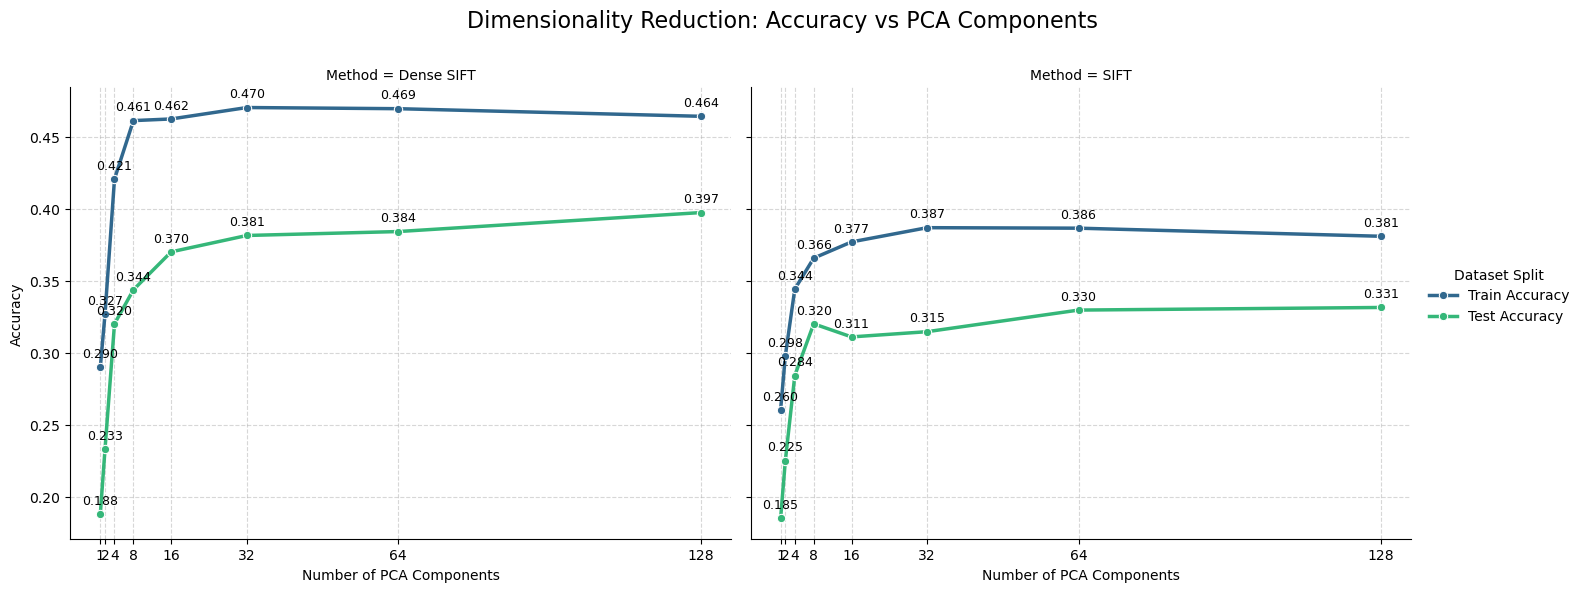

In [5]:
# 1. Load data
results_path = "results/dim_reduction_8x8.csv"

if not os.path.exists(results_path):
    print("Results file not found.")
else:
    df = pd.read_csv(results_path)

    # 2. Parsing: Separate "Method" from "Components"
    # Example: "SIFT + PCA (n=32)" -> Method="SIFT + PCA", n=32
    def parse_pca_row(row):
        # Extract the number (digits) from the string
        # Looks for digits inside or outside parentheses
        n_match = re.search(r'(\d+)', row)
        n_val = int(n_match.group(1)) if n_match else 0
        
        # Extract name (remove the number part to keep it clean)
        # e.g., "SIFT + PCA (n=32)" -> "SIFT + PCA"
        name = re.sub(r'\(.*?\)', '', row).strip() # Removes (...)
        name = re.sub(r'\d+', '', name).strip()    # Removes raw numbers if any left
        
        return pd.Series([name, n_val])

    df[['Method', 'Components']] = df['Descriptor'].apply(parse_pca_row)

    # 3. Melt (Train vs Test)
    df_melted = df.melt(
        id_vars=["Method", "Components"], 
        value_vars=["Train Accuracy", "Test Accuracy"], 
        var_name="Split", 
        value_name="Accuracy"
    )

    # Sort for clean plotting
    df_melted = df_melted.sort_values(by=["Method", "Components"])

    # 4. PLOTTING with FacetGrid
    g = sns.FacetGrid(df_melted, col="Method", height=6, aspect=1.2, sharey=True)
    
    g.map_dataframe(
        sns.lineplot, 
        x="Components", 
        y="Accuracy", 
        hue="Split", 
        palette="viridis", 
        marker="o",
        linewidth=2.5
    )

    # 5. Styling
    unique_n = sorted(df['Components'].unique())

    for ax in g.axes.flat:
        # We assume PCA components (e.g., 16, 32, 64) are linear enough, 
        # but you can uncomment the next line if you test very large ranges (10 to 1000)
        # ax.set_xscale('log') 
        
        # Force specific ticks
        ax.set_xticks(unique_n)
        ax.set_xticklabels(unique_n)
        
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_ylabel("Accuracy")
        ax.set_xlabel("Number of PCA Components")

    # 6. Add Text Labels
    methods = df_melted['Method'].unique()
    for i, method in enumerate(methods):
        # Safety check for axes index
        if i < len(g.axes.flat):
            ax = g.axes.flat[i]
            subset = df_melted[df_melted['Method'] == method]
            
            for _, row in subset.iterrows():
                ax.text(
                    row['Components'], 
                    row['Accuracy'] + 0.005, 
                    f"{row['Accuracy']:.3f}", 
                    ha='center', va='bottom', fontsize=9, color='black'
                )

    g.add_legend(title="Dataset Split")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle("Dimensionality Reduction: Accuracy vs PCA Components", fontsize=16)

    plt.show()

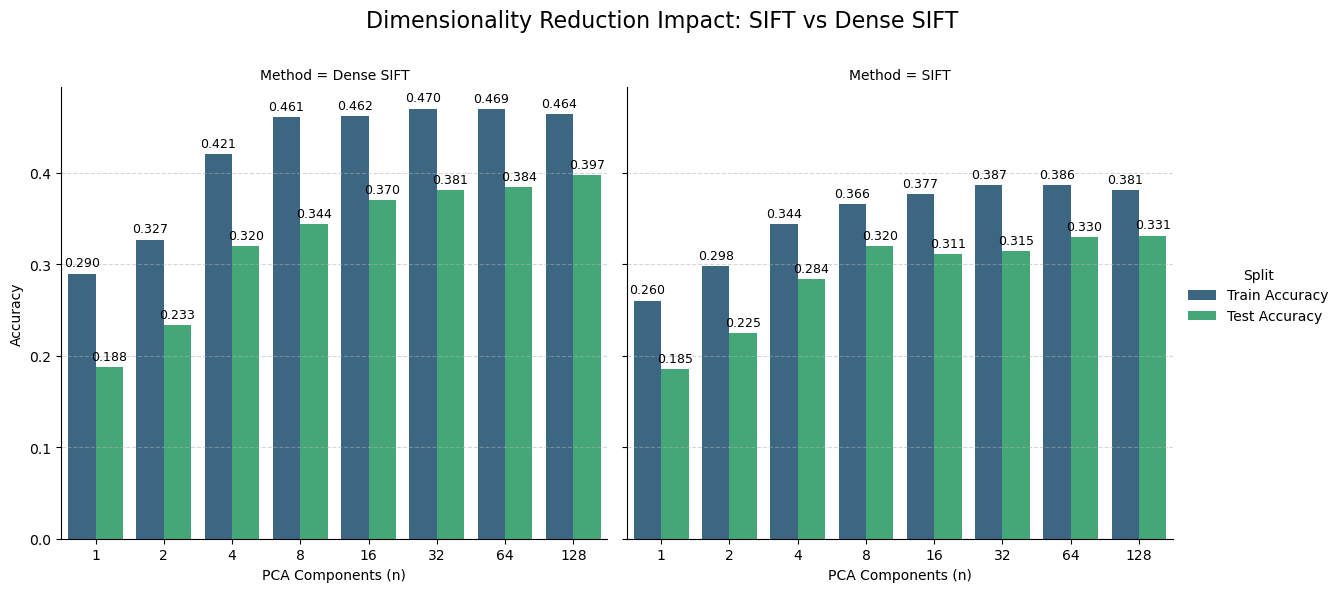

In [7]:
# 1. Load data
results_path = "results/dim_reduction_8x8.csv"

if not os.path.exists(results_path):
    print("Results file not found.")
else:
    df = pd.read_csv(results_path)

    # 2. Parsing: Separate "Method" from "Components"
    # Example: "Dense SIFT + PCA (n=32)" -> Method="Dense SIFT + PCA", n=32
    def parse_pca_row(row):
        # Extract number
        n_match = re.search(r'(\d+)', row)
        n_val = int(n_match.group(1)) if n_match else 0
        
        # Extract Method Name (Remove parenthesis and numbers)
        # "Dense SIFT + PCA (n=32)" -> "Dense SIFT + PCA"
        name = re.sub(r'\(.*?\)', '', row).strip()
        
        return pd.Series([name, n_val])

    df[['Method', 'Components']] = df['Descriptor'].apply(parse_pca_row)

    # 3. Melt (Train vs Test)
    df_melted = df.melt(
        id_vars=["Method", "Components"], 
        value_vars=["Train Accuracy", "Test Accuracy"], 
        var_name="Split", 
        value_name="Accuracy"
    )

    # Sort
    df_melted = df_melted.sort_values(by=["Method", "Components"])

    # 4. PLOTTING: Catplot (The best for splitting categorical data)
    # kind="bar" -> Bar Plot
    # col="Method" -> Creates one separate chart per Method (Side-by-Side)
    g = sns.catplot(
        data=df_melted,
        kind="bar",
        x="Components",
        y="Accuracy",
        hue="Split",
        col="Method",  # <--- THIS SEPARATES SIFT vs DENSE
        palette="viridis",
        height=6,
        aspect=1,
        sharey=True
    )

    # 5. Styling & Labels
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("Dimensionality Reduction Impact: SIFT vs Dense SIFT", fontsize=16)
    g.set_axis_labels("PCA Components (n)", "Accuracy")

    # Add numbers on top of bars
    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.show()

## Normalization and Scaling

In [9]:
# Load experiments from JSON
config_path = "configs/norm_scale_8x8.json"
results_path = "results/norm_scale_8x8.csv"

# Load experiments and existing results
experiments_list = load_json(config_path=config_path)
results_data = load_existing_results(results_path)
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

experiments_list = [exp for exp in experiments_list if not is_experiment_completed(exp["name"], results_data)]
print(f"{len(experiments_list)} experiments to run after filtering completed ones.")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc, cv_scores = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV Scores": cv_scores,
        "Time (s)": duration
    })

# Save results to csv
if (len(experiments_list) > 0):
    # Create DataFrame 
    df = pd.DataFrame(results_data)
    print("Processed Results:")
    display(df)
    df.to_csv(results_path, index=False)

print("\nAll experiments finished.")

Resuming from existing file: results/norm_scale_8x8.csv
Loaded 18 experiments from configs/norm_scale_8x8.json
9 experiments to run after filtering completed ones.

Running: Dense_SIFT_None_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:19<00:00, 435.52it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:17<00:00, 494.08it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2954 (+/- 0.0075)


c:\Users\alvar\miniconda3\envs\env-c3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on Phase [Train]: 0.5459
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 538.26it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3432

Running: Dense_SIFT_L2_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:19<00:00, 440.80it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:19<00:00, 455.37it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.3259 (+/- 0.0100)
Accuracy on Phase [Train]: 0.4648
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:04<00:00, 478.97it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3964

Running: Dense_SIFT_L1_None
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:19<00:00, 443.49it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:18<00:00, 479.04it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2720 (+/- 0.0105)
Accuracy on Phase [Train]: 0.3171
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 375.73it/s]


Predicting values...
Accuracy on Phase [Test]: 0.3018

Running: Dense_SIFT_L2_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:25<00:00, 343.45it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:23<00:00, 373.52it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: StandardScaler...
Performing Cross-Validation...
CV Accuracy: 0.2992 (+/- 0.0082)
Accuracy on Phase [Train]: 0.5421
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 390.63it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3400

Running: Dense_SIFT_L1_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:25<00:00, 339.30it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:24<00:00, 362.26it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: StandardScaler...
Performing Cross-Validation...
CV Accuracy: 0.2968 (+/- 0.0060)
Accuracy on Phase [Train]: 0.5468
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 371.59it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3445

Running: Dense_SIFT_None_Standard
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:25<00:00, 336.94it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:24<00:00, 360.24it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: StandardScaler...
Performing Cross-Validation...
CV Accuracy: 0.2968 (+/- 0.0060)
Accuracy on Phase [Train]: 0.5468
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:05<00:00, 374.38it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3445

Running: Dense_SIFT_L2_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:26<00:00, 334.30it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:25<00:00, 345.41it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: MinMaxScaler...
Performing Cross-Validation...
CV Accuracy: 0.3234 (+/- 0.0081)
Accuracy on Phase [Train]: 0.5244
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 359.94it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3745

Running: Dense_SIFT_L1_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:26<00:00, 332.45it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:25<00:00, 340.31it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: MinMaxScaler...
Performing Cross-Validation...
CV Accuracy: 0.3275 (+/- 0.0099)
Accuracy on Phase [Train]: 0.5162
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 358.95it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3714

Running: Dense_SIFT_None_MinMax
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 200...


Fitting Codebook: 100%|██████████| 8700/8700 [00:23<00:00, 364.25it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:25<00:00, 336.71it/s]


Fitting the classifier: LogisticRegression...
Fitting Scaler: MinMaxScaler...
Performing Cross-Validation...
CV Accuracy: 0.3275 (+/- 0.0099)
Accuracy on Phase [Train]: 0.5162
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:06<00:00, 341.78it/s]


Applying Scaler transform...
Predicting values...
Accuracy on Phase [Test]: 0.3714
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,CV Scores,Time (s)
0,SIFT_None_None,0.407011,0.307727,[0.27931034 0.28965517 0.27356322 0.25 0...,57.461206
1,SIFT_L2_None,0.380805,0.332727,[0.29425287 0.31724138 0.29367816 0.25574713 0...,48.265922
2,SIFT_L1_None,0.261724,0.244545,[0.22356322 0.24942529 0.26264368 0.22471264 0...,51.983635
3,SIFT_L2_Standard,0.401954,0.305455,[0.27758621 0.29885057 0.2683908 0.24597701 0...,52.767069
4,SIFT_L1_Standard,0.389885,0.300455,[0.27701149 0.28448276 0.27126437 0.23275862 0...,54.533914
5,SIFT_None_Standard,0.406437,0.308182,[0.27873563 0.28908046 0.27643678 0.24885057 0...,54.336586
6,SIFT_L2_MinMax,0.398851,0.312727,[0.29195402 0.30689655 0.28563218 0.25172414 0...,53.602636
7,SIFT_L1_MinMax,0.371724,0.297273,[0.28965517 0.29137931 0.28390805 0.23965517 0...,54.462913
8,SIFT_None_MinMax,0.394713,0.319091,[0.29425287 0.30114943 0.27988506 0.2545977 0...,57.693491
9,Dense_SIFT_None_None,0.545862,0.343182,"[0.29195402298850576, 0.30689655172413793, 0.2...",93.384832



All experiments finished.


In [8]:
# # Load results
# results = pd.read_csv("results/norm_scale.csv")


# # 2. Extract Norm and Scale for cleaner labeling and sorting
# df[['Prefix', 'Norm', 'Scale']] = df['Descriptor'].str.split('_', expand=True)

# # 3. Sort the data systematically
# # This ensures the bars are grouped logically (e.g., all "Scale: None" together)
# norm_order = ['None', 'L1', 'L2']
# scale_order = ['None', 'Standard', 'MinMax']

# df['Norm'] = pd.Categorical(df['Norm'], categories=norm_order, ordered=True)
# df['Scale'] = pd.Categorical(df['Scale'], categories=scale_order, ordered=True)
# df = df.sort_values(by=['Scale', 'Norm'])

# # Create a clean label for the X-axis
# df['Label'] = "Norm: " + df['Norm'].astype(str) + "\nScale: " + df['Scale'].astype(str)

# # 4. Melt for Seaborn
# df_melted = df.melt(
#     id_vars=['Label'], 
#     value_vars=['Train Accuracy', 'Test Accuracy'], 
#     var_name='Split', 
#     value_name='Accuracy'
# )

# plt.figure(figsize=(12, 6))

# # 5. Bar Plot
# ax = sns.barplot(
#     x='Label', 
#     y='Accuracy', 
#     hue='Split', 
#     data=df_melted, 
#     palette='viridis'
# )

# # 6. Add value labels on top of bars
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

# plt.title("Train vs Test Accuracy by Normalization & Scaling Strategy")
# plt.ylim(0, 0.5) # Adjust based on your max value
# plt.ylabel("Accuracy")
# plt.xlabel("") # Label is self-explanatory
# plt.legend(title="Dataset Split", loc='upper right')
# plt.grid(True, axis='y', linestyle='--', alpha=0.5)
# plt.xticks(rotation=0) # Keep labels horizontal if they fit, or 45 if they don't

# plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_16416\1978720669.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\alvar\AppData\Local\Temp\ipykernel_16416\1978720669.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


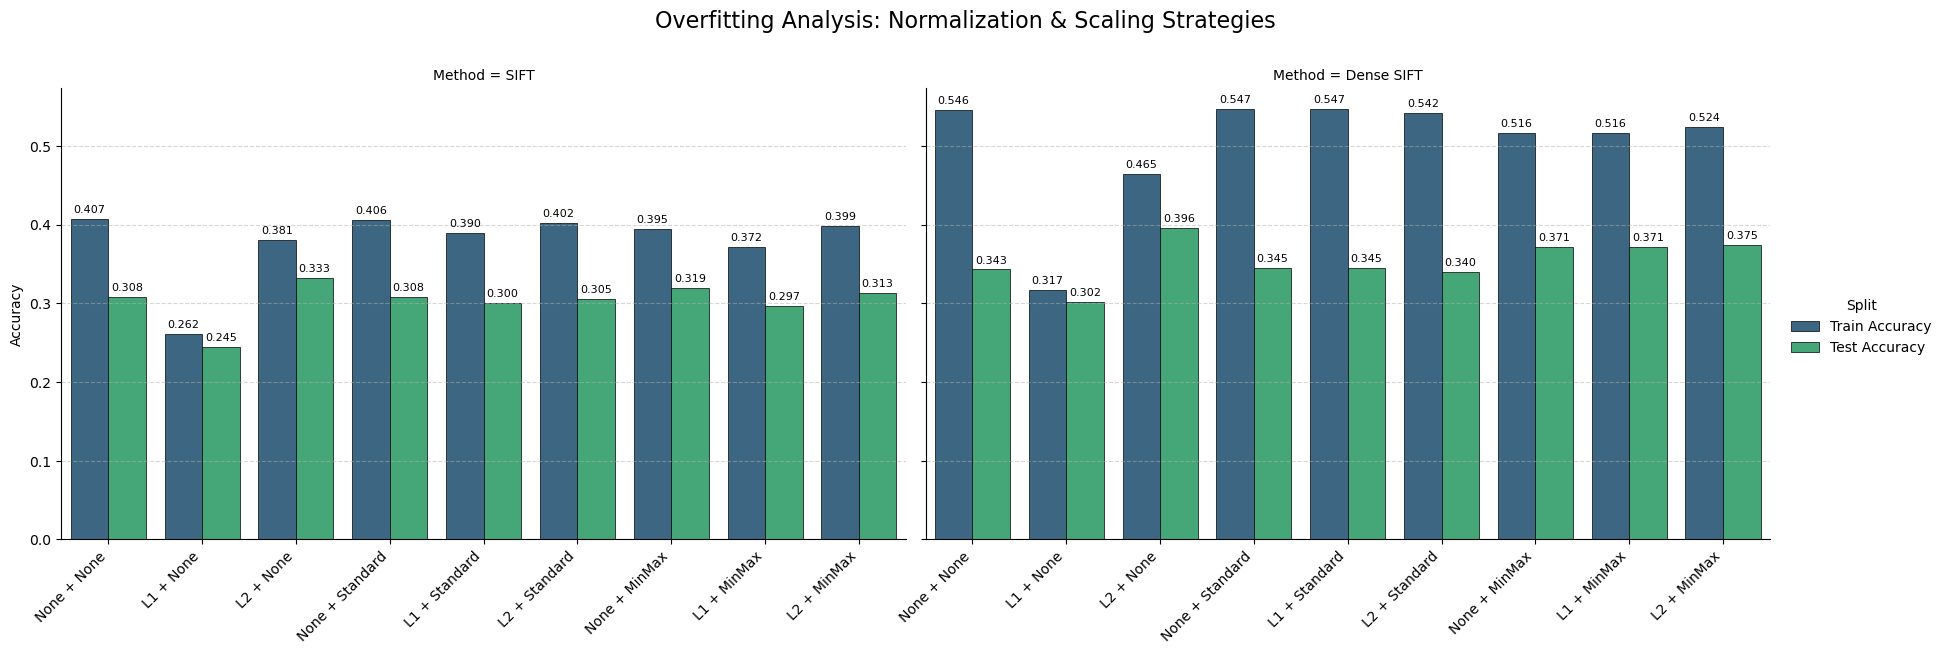

In [11]:
# 1. Load results
results_path = "results/norm_scale_8x8.csv"
df = pd.read_csv(results_path) # For demo purposes
# 2. Parse Method, Norm, and Scale
def parse_descriptor(row):
    row = row.replace("Dense_IFT", "Dense_SIFT") # Fix typo
    parts = row.split('_')
    
    if parts[0] == "SIFT":
        return pd.Series(["SIFT", parts[1], parts[2]])
    elif parts[0] == "Dense":
        return pd.Series(["Dense SIFT", parts[2], parts[3]])
    else:
        return pd.Series(["Unknown", "None", "None"])

df[['Method', 'Norm', 'Scale']] = df['Descriptor'].apply(parse_descriptor)

# 3. Create a clean Label for the X-axis
df['Label'] = df['Norm'] + " + " + df['Scale']

# 4. Melt (Train vs Test)
df_melted = df.melt(
    id_vars=['Method', 'Label', 'Norm', 'Scale'], 
    value_vars=['Train Accuracy', 'Test Accuracy'], 
    var_name='Split', 
    value_name='Accuracy'
)

# 5. Define Order for plotting
# Sort by Scale then Norm to group them logically
scale_order = ['None', 'Standard', 'MinMax']
norm_order = ['None', 'L1', 'L2']
df_melted['Scale'] = pd.Categorical(df_melted['Scale'], categories=scale_order, ordered=True)
df_melted['Norm'] = pd.Categorical(df_melted['Norm'], categories=norm_order, ordered=True)
df_melted = df_melted.sort_values(by=['Scale', 'Norm'])

# 6. PLOT: Side-by-Side Bar Chart using Catplot
g = sns.catplot(
    data=df_melted,
    kind="bar",
    x="Label",
    y="Accuracy",
    hue="Split",
    col="Method", # <--- This separates SIFT vs Dense SIFT (like the previous plot)
    palette="viridis",
    height=6,
    aspect=1.5,
    sharey=True,
    edgecolor="black",
    linewidth=0.5
)

# 7. Styling
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Overfitting Analysis: Normalization & Scaling Strategies", fontsize=16)
g.set_axis_labels("", "Accuracy")

# Rotate X-labels and add numbers
for ax in g.axes.flat:
    # Rotate labels to avoid overlap
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add numbers on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3, fontsize=8)

plt.show()

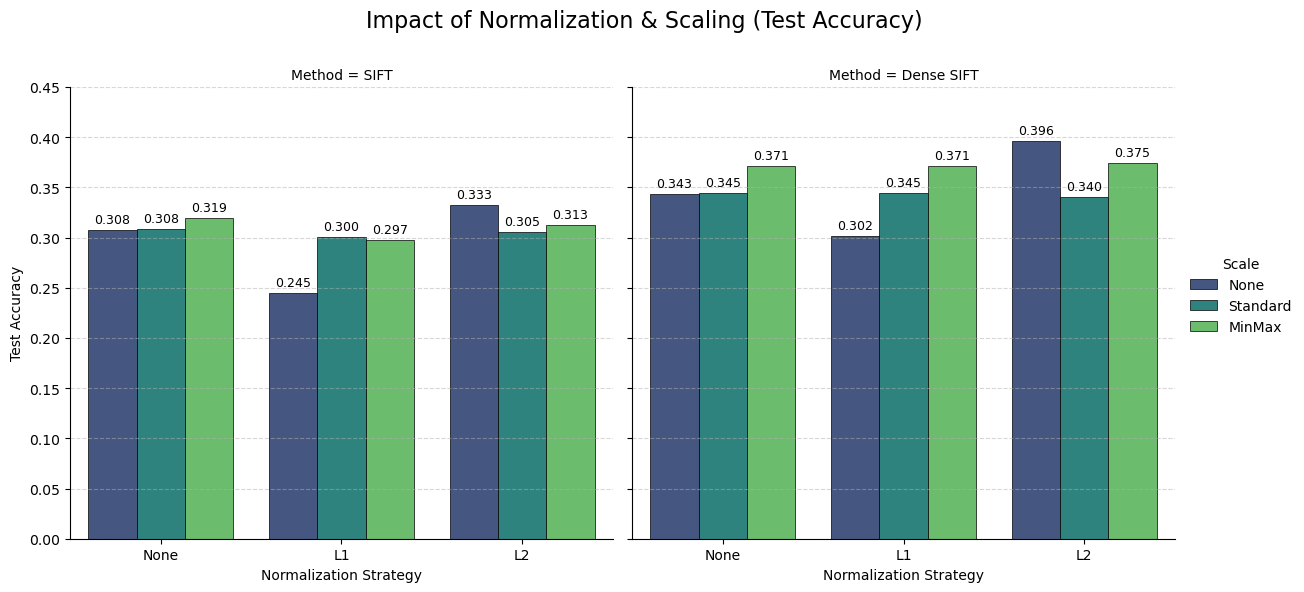

In [12]:
# 1. Load results
results_path = "results/norm_scale_8x8.csv"
df = pd.read_csv(results_path) # For demo purposes

# 2. Advanced Parsing Function
def parse_descriptor(row):
    # Handle the typo "Dense_IFT" -> "Dense_SIFT"
    row = row.replace("Dense_IFT", "Dense_SIFT")
    
    parts = row.split('_')
    
    # Logic: 
    # If SIFT_... (3 parts) -> Method=SIFT, Norm=1, Scale=2
    # If Dense_SIFT_... (4 parts) -> Method=Dense SIFT, Norm=2, Scale=3
    
    if parts[0] == "SIFT":
        return pd.Series(["SIFT", parts[1], parts[2]])
    elif parts[0] == "Dense":
        return pd.Series(["Dense SIFT", parts[2], parts[3]])
    else:
        return pd.Series(["Unknown", "None", "None"])

df[['Method', 'Norm', 'Scale']] = df['Descriptor'].apply(parse_descriptor)

# 3. Define Categorical Order (To make the plot logical)
norm_order = ['None', 'L1', 'L2']
scale_order = ['None', 'Standard', 'MinMax']

df['Norm'] = pd.Categorical(df['Norm'], categories=norm_order, ordered=True)
df['Scale'] = pd.Categorical(df['Scale'], categories=scale_order, ordered=True)

# 4. PLOTTING: FacetGrid Bar Chart (Side-by-Side)
g = sns.catplot(
    data=df,
    kind="bar",
    x="Norm",
    y="Test Accuracy",
    hue="Scale",
    col="Method", # Separates SIFT vs Dense SIFT
    palette="viridis",
    height=6,
    aspect=1,
    edgecolor="black",
    linewidth=0.5
)

# 5. Styling
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Impact of Normalization & Scaling (Test Accuracy)", fontsize=16)
g.set_axis_labels("Normalization Strategy", "Test Accuracy")

# Add numbers on top of bars
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)
    
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    # Set ylim slightly higher than max value to fit labels
    ax.set_ylim(0, 0.45) 

plt.show()